In [2]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
import matplotlib.pyplot as plt
import scipy.special
import seaborn as sns

In [65]:
dpi = 300
transparent = True
PI = np.pi
TWO_PI = 2*PI
NUM = 44000
show = False

sns.set_theme('talk')
sns.set_style("whitegrid")

In [62]:
def lineplot(x, y, filename=None, title=None, xlim=None, ylim=None, ax=None, fig=None, label=None):
    if not ax or not fig:
        fig, ax = plt.subplots()
    ax.plot(x, y, label=label)
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')
    ax.set_title(title)
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)
    if show:
        plt.show()
    if filename != None:
        fig.savefig(filename, bbox_inches='tight',
                    transparent=transparent, pad_inches=0, dpi=dpi)
    return fig, ax

In [5]:
def cos(freq, phase):
    return lambda t: np.sqrt(2) * np.cos(TWO_PI * (freq * t - phase))

In [8]:
def plot_cos(freq, phase, filename=None):
    t = np.linspace(0, 1, NUM)
    amp = cos(freq, phase)(t)
    lineplot(t, amp, filename)

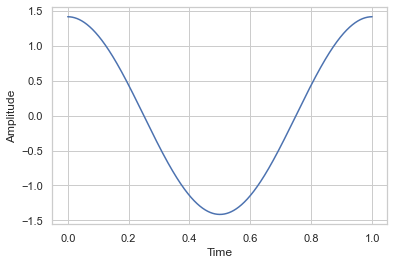

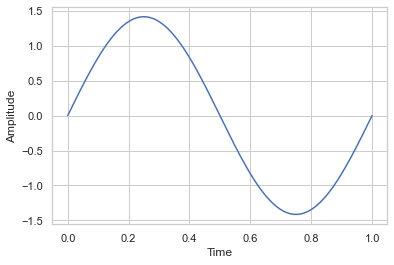

In [9]:
plot_cos(1, 0)
plot_cos(1, 0.25)

In [10]:
quad(lambda t: cos(1, 0)(t) * cos(1,0)(t), 0, 1)

(1.0000000000000002, 7.339841005112145e-10)